In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.signal_categories import topological_category_labels
from src.file_locations import data_files_location

In [2]:
all_df = pd.read_pickle('../training_outputs/first_combined_training/predictions.pkl')

all_df

,filetype,run,subrun,event,used_for_training,used_for_testing,prob_1gNp,prob_1g0p,prob_1gNp1mu,prob_1g0p1mu,...,prob_2g0p,prob_2gNp1mu,prob_2g0p1mu,prob_2g_outFV,prob_1eNp,prob_1e0p,prob_0g,prob_3plusg,prob_dirt,prob_ext
0,nu_overlay,19854,255,12800,False,True,0.000757,0.002941,0.000514,0.000160,...,0.003184,0.000547,0.000398,0.000977,0.000051,0.000005,0.242148,0.000317,0.090412,0.631925
1,nu_overlay,21129,31,1573,True,False,0.004810,0.000866,0.009673,0.000697,...,0.004037,0.006517,0.001940,0.004513,0.000138,0.000009,0.925745,0.000570,0.001844,0.030045
2,nu_overlay,20818,384,19228,False,True,0.001381,0.001606,0.001487,0.000198,...,0.002867,0.003349,0.000513,0.000577,0.000205,0.000040,0.812107,0.000224,0.015758,0.154273
3,nu_overlay,20225,230,11542,True,False,0.000232,0.000050,0.012551,0.000136,...,0.000251,0.004868,0.002110,0.000753,0.000020,0.000004,0.972213,0.000691,0.000153,0.004112
4,nu_overlay,20453,343,17156,False,True,0.000138,0.000038,0.002071,0.000047,...,0.000246,0.029301,0.006420,0.000166,0.000128,0.000006,0.955914,0.002136,0.000026,0.001119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356800,nc_pi0_overlay,25751,154,7711,True,False,0.171783,0.008384,0.002147,0.001226,...,0.175133,0.013510,0.005802,0.003052,0.000056,0.000043,0.001721,0.002509,0.000511,0.002733
356801,nc_pi0_overlay,25751,154,7715,False,True,0.002454,0.001740,0.000847,0.000231,...,0.367651,0.067337,0.023865,0.008723,0.000246,0.000082,0.007103,0.182235,0.000372,0.092119
356802,nc_pi0_overlay,25751,154,7725,False,True,0.003988,0.003500,0.007417,0.000296,...,0.012527,0.010682,0.001667,0.001561,0.000040,0.000007,0.764642,0.000430,0.047104,0.112612
356803,nc_pi0_overlay,25751,154,7726,True,False,0.049792,0.008241,0.030816,0.004053,...,0.154540,0.175543,0.038987,0.031522,0.000843,0.000031,0.018431,0.031486,0.002845,0.011512


In [3]:
df = all_df.query("filetype == 'nu_overlay'")

prob_categories = ["prob_" + cat for cat in topological_category_labels]
probs_2d_arr = df[prob_categories].to_numpy()
reco_categories_argmax = np.argmax(probs_2d_arr, axis=1)
df["reco_category_argmax_index"] = reco_categories_argmax

rse_dic = {}
for i, cat in enumerate(topological_category_labels):
    df_cat = df.query(f"reco_category_argmax_index == {i}")
    rse_dic[cat] = []
    for j in range(40):
        rse_dic[cat].append((df_cat["run"].to_numpy()[j], df_cat["subrun"].to_numpy()[j], df_cat["event"].to_numpy()[j]))
    print(f"{cat}: {len(df_cat)}")

rse_dic

1gNp: 294
1g0p: 91
1gNp1mu: 871
1g0p1mu: 146
1g_outFV: 1121
2gNp: 5173
2g0p: 3136
2gNp1mu: 15133
2g0p1mu: 1639
2g_outFV: 910
1eNp: 798
1e0p: 126
0g: 62289
3plusg: 3270
dirt: 148
ext: 4637


/tmp/ipykernel_2889898/3405521176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reco_category_argmax_index"] = reco_categories_argmax


{'1gNp': [(np.int64(20631), np.int64(126), np.int64(6334)),
  (np.int64(20362), np.int64(9), np.int64(478)),
  (np.int64(20454), np.int64(180), np.int64(9007)),
  (np.int64(20461), np.int64(176), np.int64(8812)),
  (np.int64(20821), np.int64(99), np.int64(4974)),
  (np.int64(20036), np.int64(539), np.int64(26995)),
  (np.int64(21254), np.int64(36), np.int64(1835)),
  (np.int64(19998), np.int64(32), np.int64(1638)),
  (np.int64(20230), np.int64(115), np.int64(5783)),
  (np.int64(20112), np.int64(72), np.int64(3606)),
  (np.int64(20108), np.int64(38), np.int64(1904)),
  (np.int64(20929), np.int64(1), np.int64(71)),
  (np.int64(20470), np.int64(144), np.int64(7204)),
  (np.int64(20362), np.int64(177), np.int64(8859)),
  (np.int64(19941), np.int64(76), np.int64(3843)),
  (np.int64(20840), np.int64(51), np.int64(2580)),
  (np.int64(20003), np.int64(517), np.int64(25882)),
  (np.int64(20283), np.int64(150), np.int64(7527)),
  (np.int64(19925), np.int64(590), np.int64(29526)),
  (np.int64(204

In [4]:
f = uproot.open(f"{data_files_location}/MCC9.10_Run4b_v10_04_07_09_BNB_nu_overlay_surprise_reco2_hist.root")

dic = {}
dic.update(f["wcpselection"]["T_eval"].arrays(["run", "subrun", "event"], library="np"))
dic.update(f["wcpselection"]["T_spacepoints"].arrays(["Trecchargeblob_spacepoints_x", "Trecchargeblob_spacepoints_y", "Trecchargeblob_spacepoints_z", "Trecchargeblob_spacepoints_q"], library="np"))
for col in dic:
    dic[col] = dic[col].tolist()
spacepoints_df = pd.DataFrame(dic)

spacepoints_df

,run,subrun,event,Trecchargeblob_spacepoints_x,Trecchargeblob_spacepoints_y,Trecchargeblob_spacepoints_z,Trecchargeblob_spacepoints_q
0,19854,255,12755,"[130.7474609375, 111.67425537109375, 111.15015...","[97.480126953125, 97.63590087890626, 97.609155...","[364.46123046875, 384.957421875, 385.129052734...","[2101.60240615032, 1748.8577514515432, 1966.87..."
1,19854,255,12759,[],[],[],[]
2,19854,255,12763,[],[],[],[]
3,19854,255,12784,"[55.93079833984375, 55.904669189453124, 241.66...","[-101.74237060546875, -101.6232177734375, -80....","[127.903515625, 127.74969482421875, 698.057080...","[-111.65921658938942, 413.00546869149025, 2028..."
4,19854,255,12791,"[175.478369140625, 175.94605712890626, 177.023...","[-13.759254455566406, -11.316919708251953, -5....","[932.2978515625, 932.55927734375, 940.40439453...","[2136.408015920413, 3634.8167189041733, 12372...."
...,...,...,...,...,...,...,...
635425,20940,18,904,"[74.79102172851563, 74.79102172851563, 20.6431...","[50.94919128417969, 50.94919128417969, 17.6990...","[406.4621826171875, 406.4621826171875, 548.519...","[3116.219983984236, 3116.219983984236, 1330.34..."
635426,20940,18,909,[],[],[],[]
635427,20940,18,914,"[200.2470947265625, 179.242138671875, 137.0871...","[-31.715109252929686, -43.12913513183594, -69....","[180.136083984375, 196.7329833984375, 227.8300...","[8485.446903755683, 2215.4406320908643, 3187.6..."
635428,20940,18,940,[],[],[],[]


################################################## NEW CATEGORY ##################################################


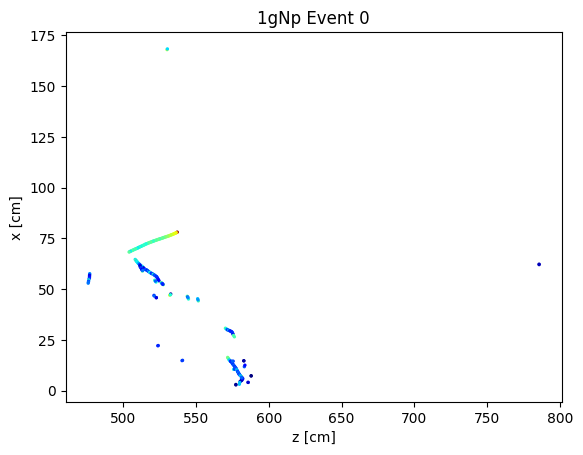

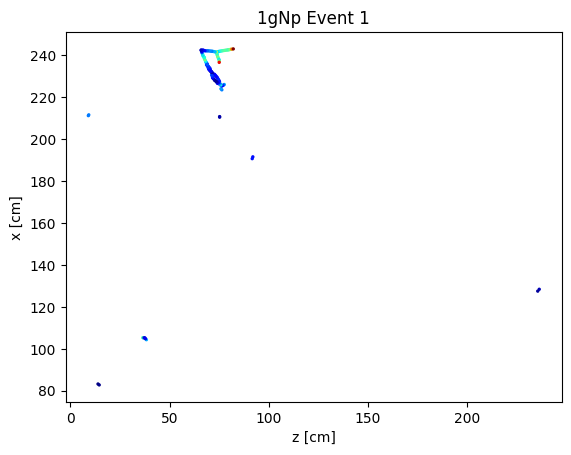

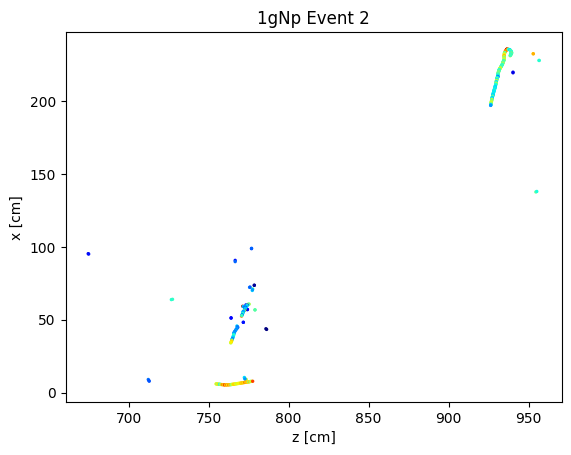

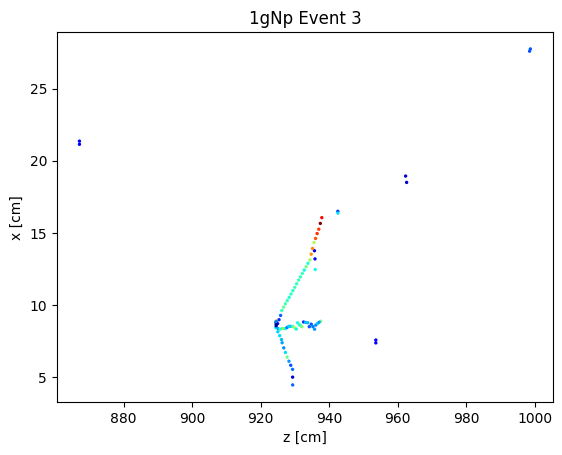

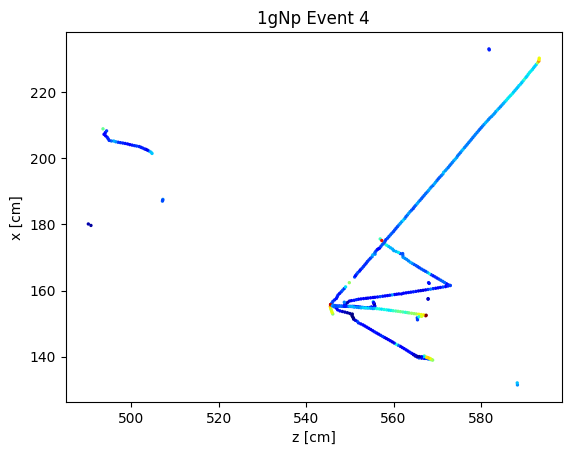

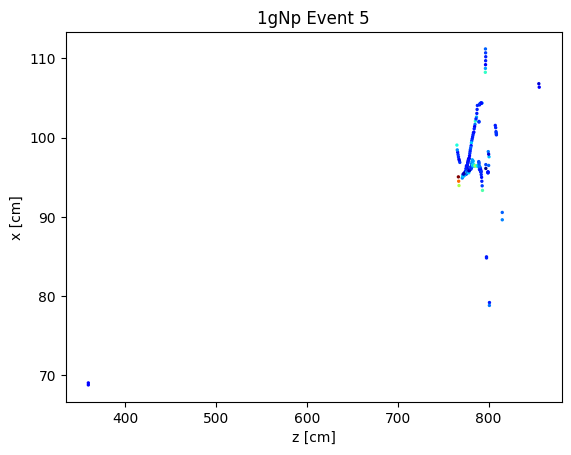

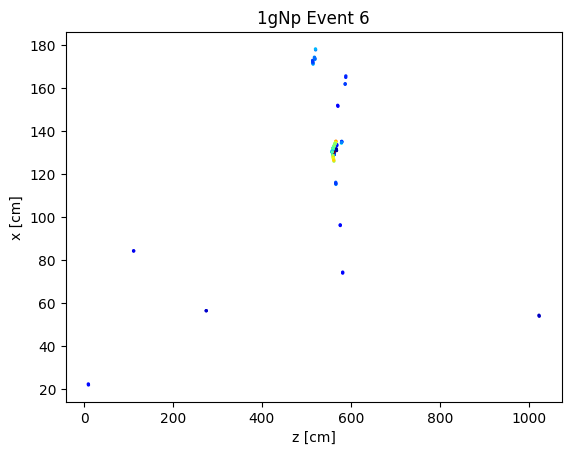

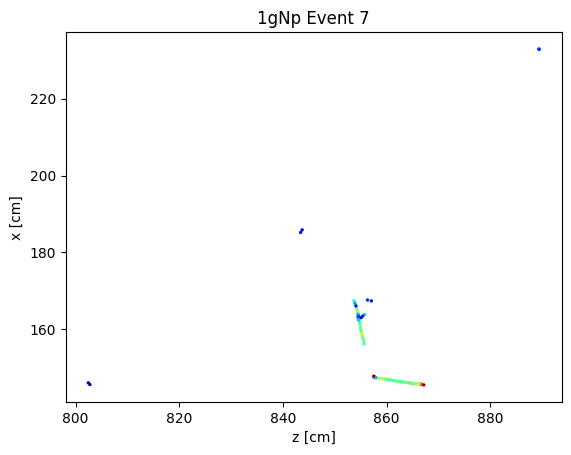

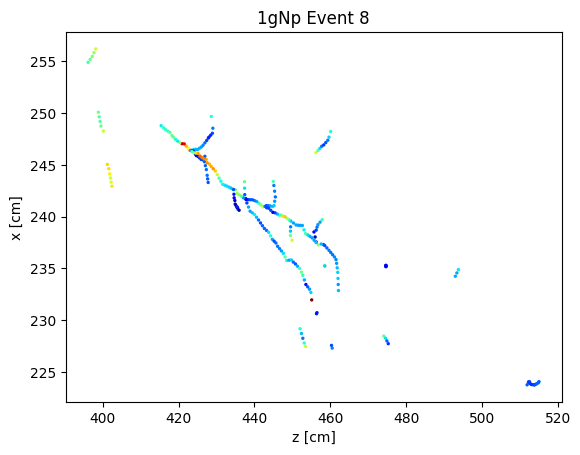

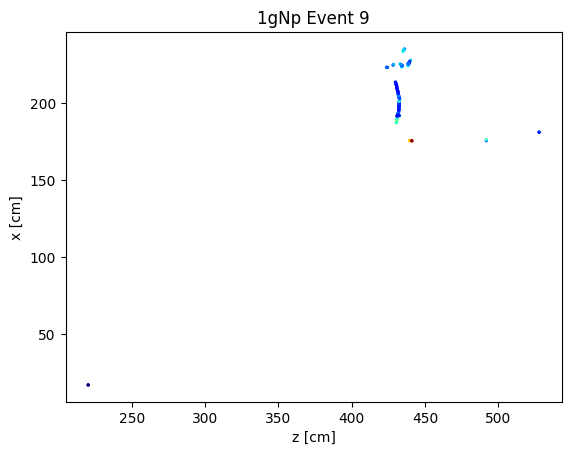

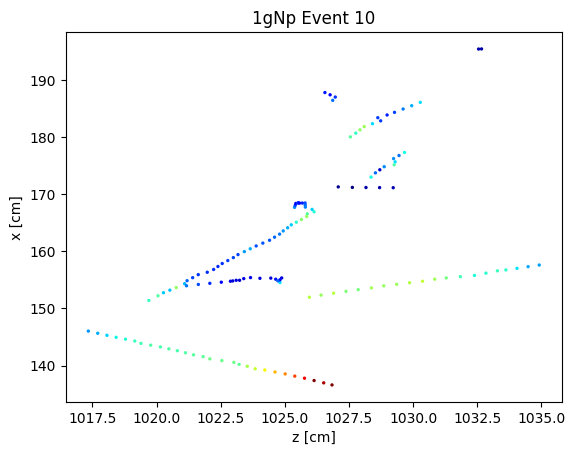

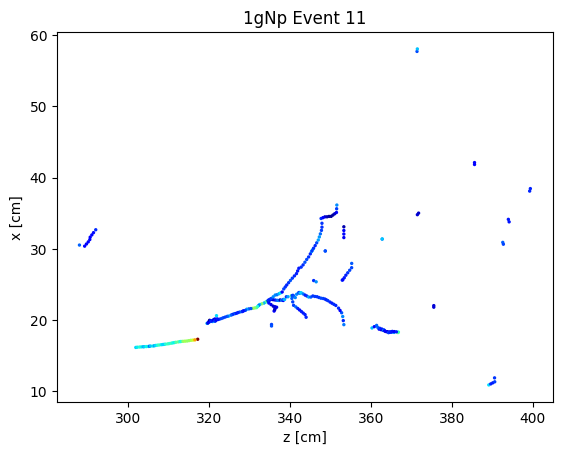

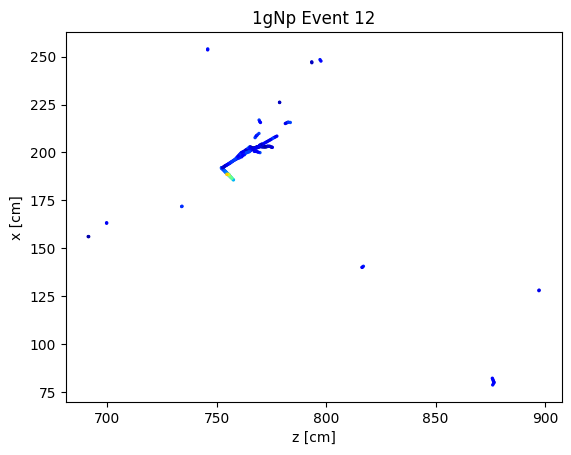

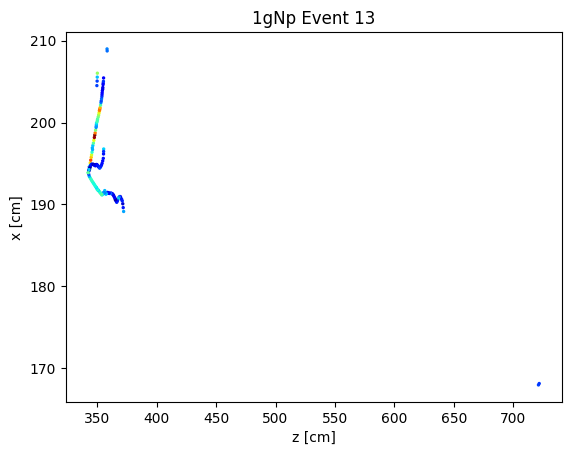

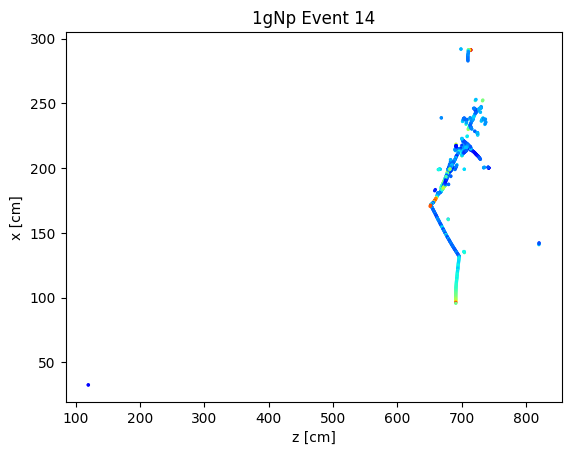

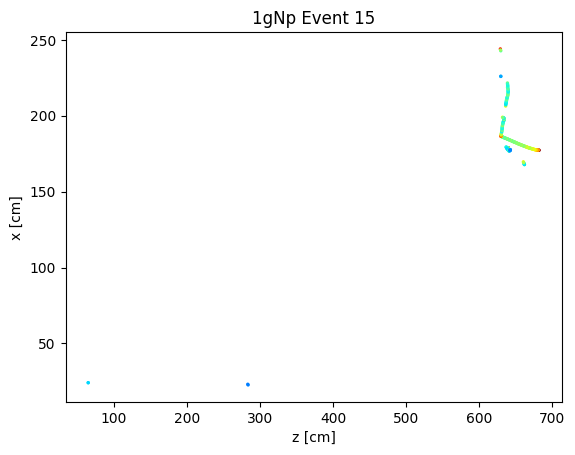

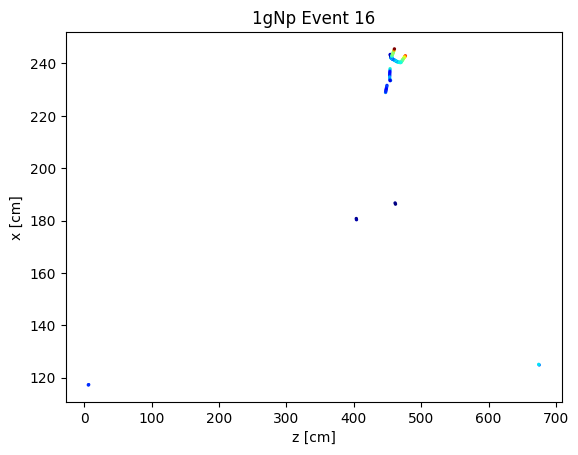

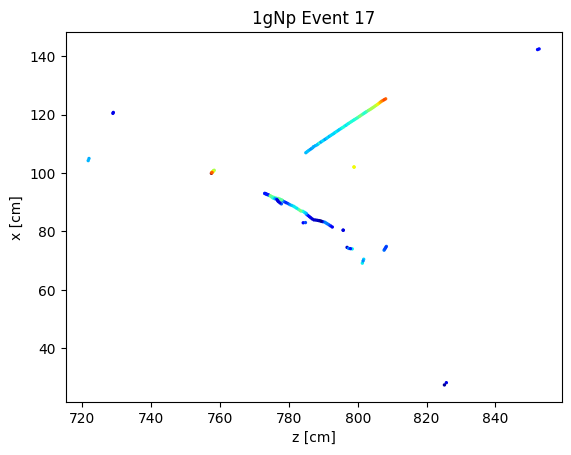

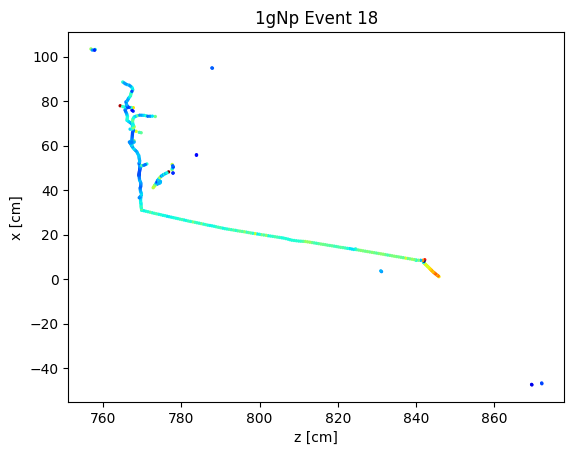

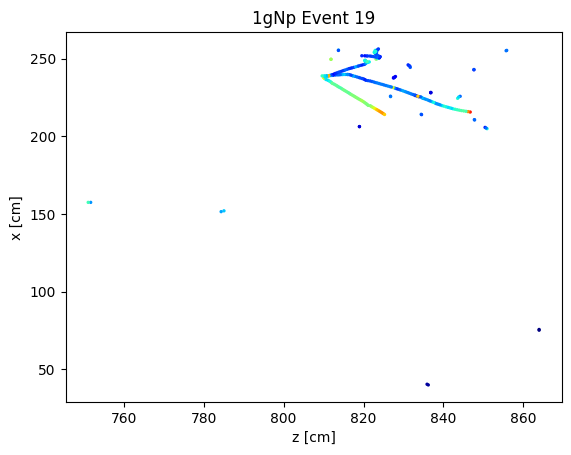

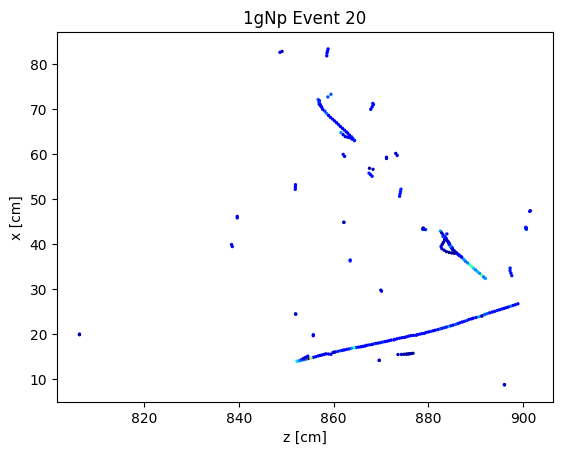

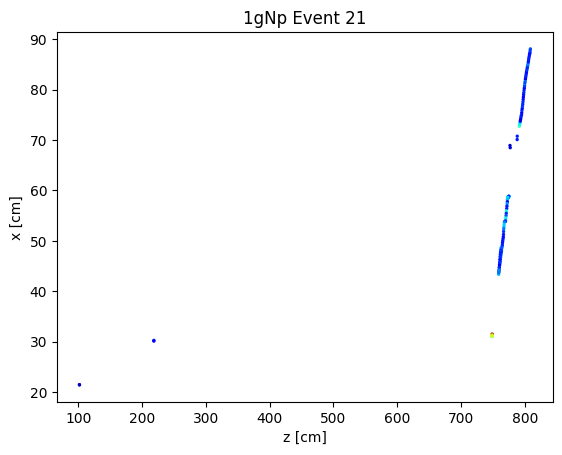

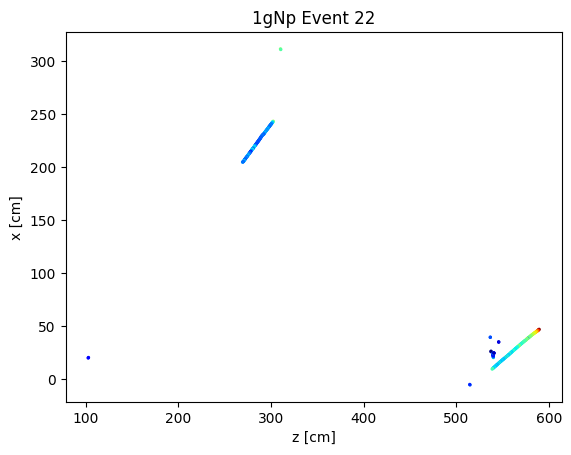

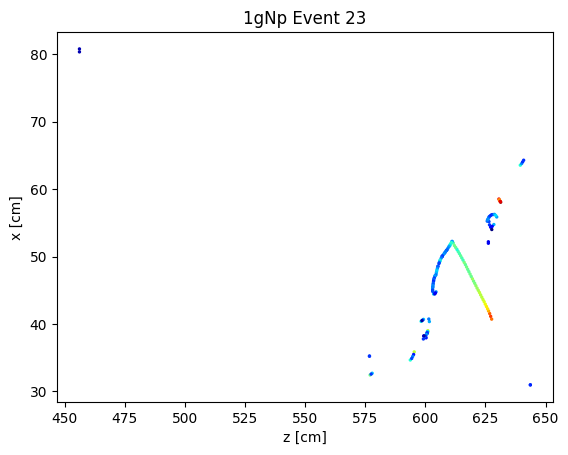

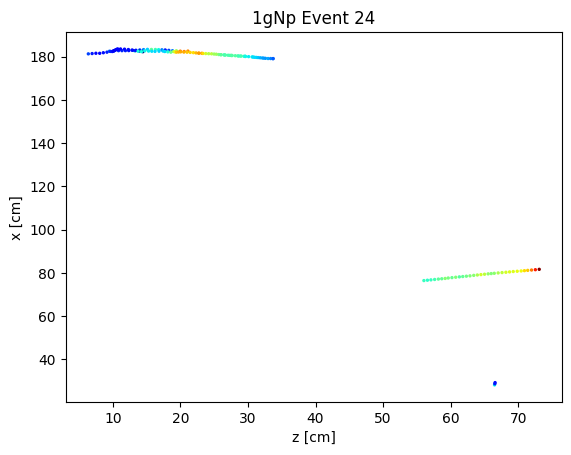

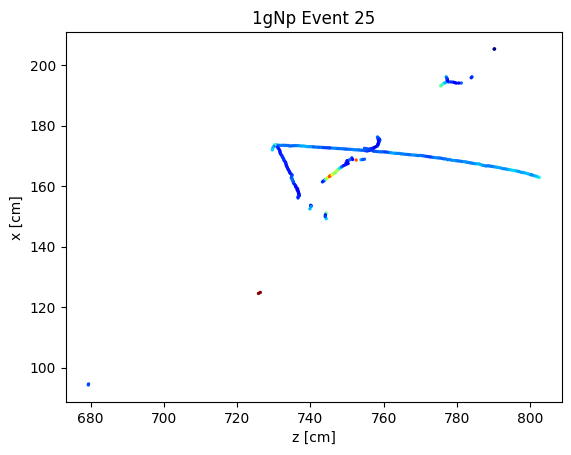

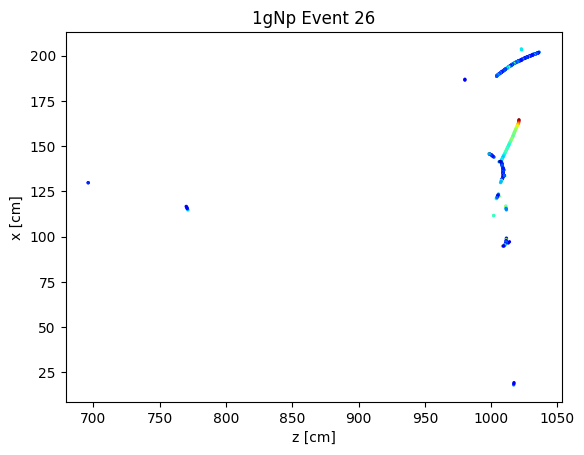

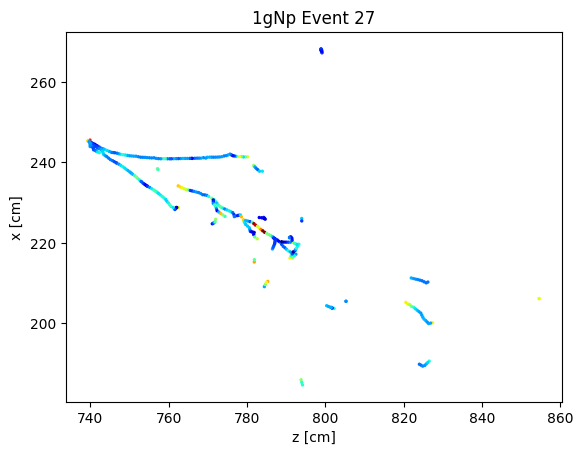

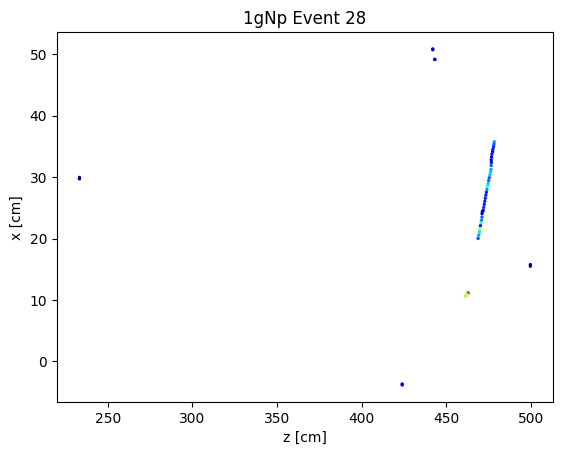

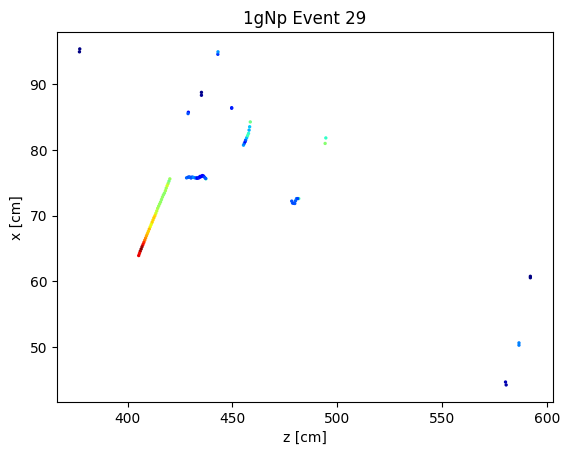

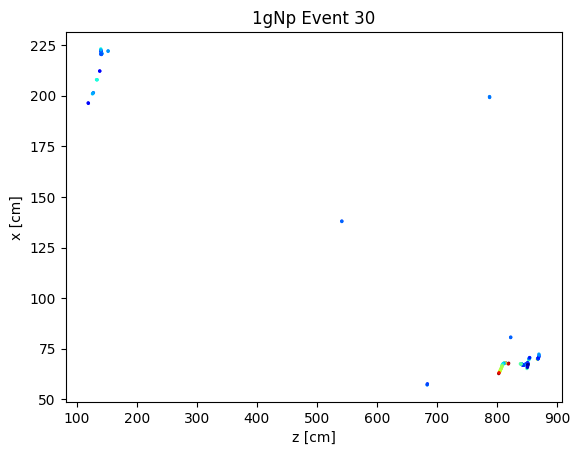

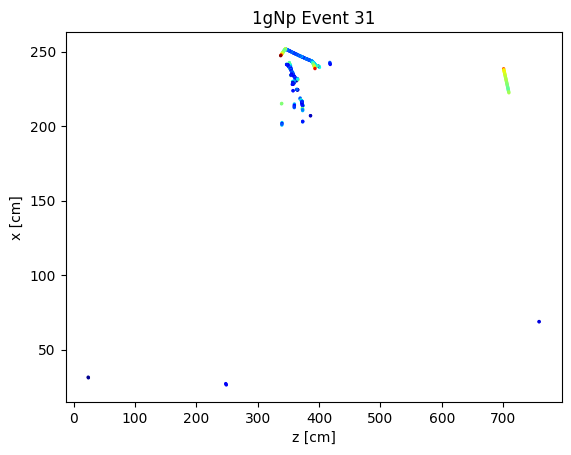

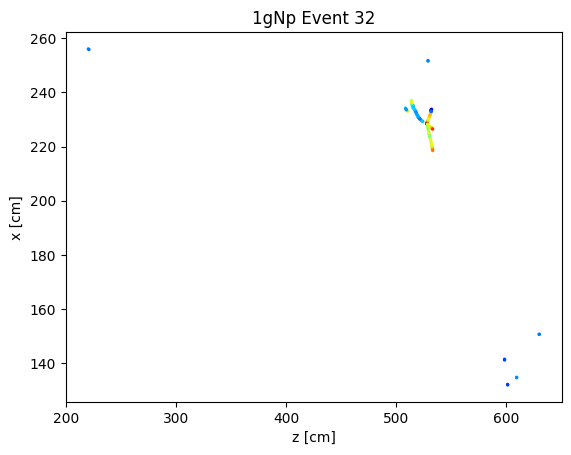

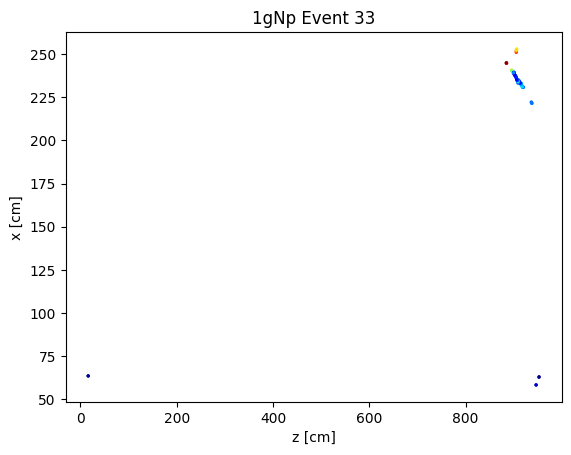

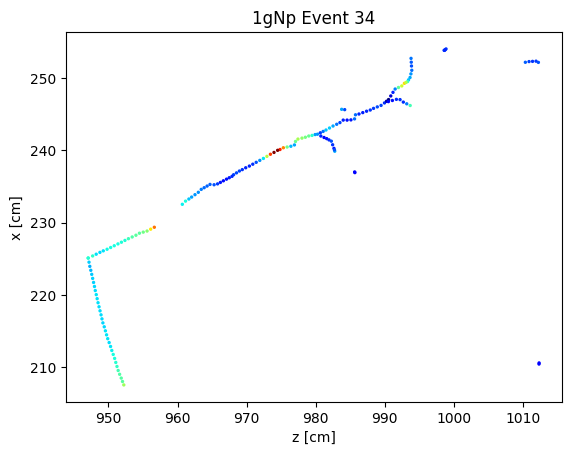

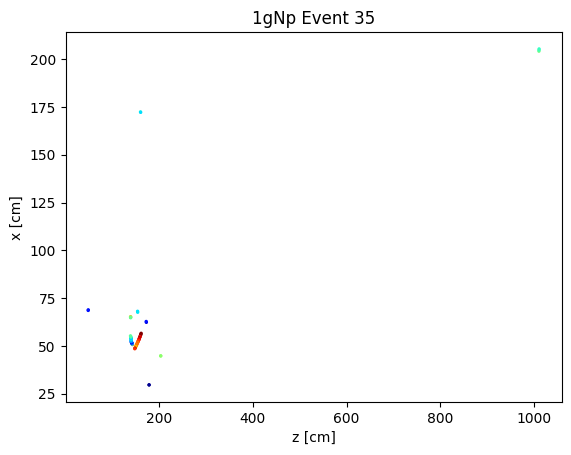

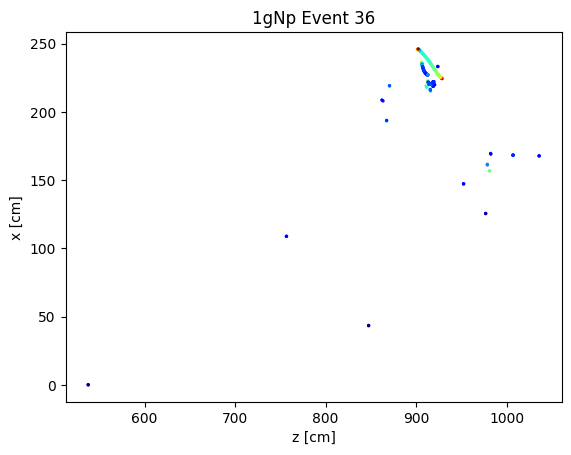

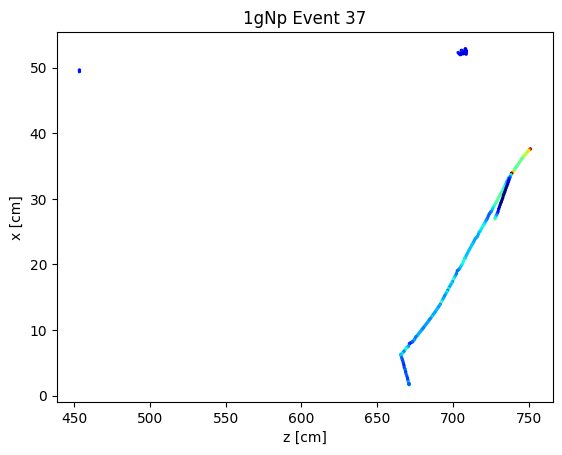

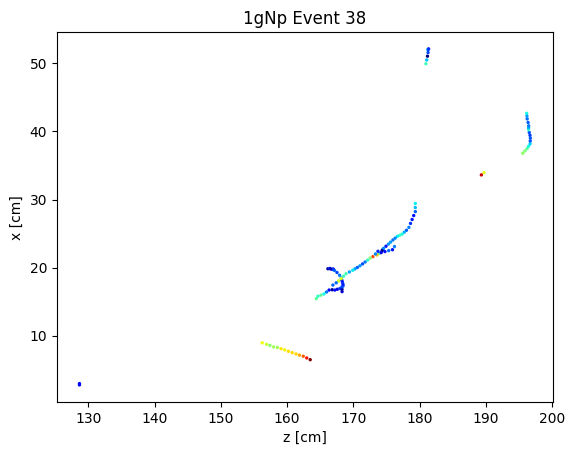

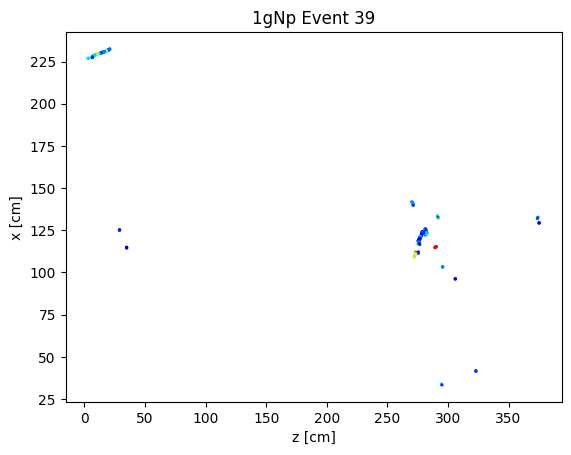

ZeroDivisionError: division by zero

In [5]:
num_events = 40

for cat, rses in rse_dic.items():

    print("################################################## NEW CATEGORY ##################################################")

    for event_i in range(min(num_events, len(rses))):

        curr_event_df = spacepoints_df.query(f"run == {rses[event_i][0]} and subrun == {rses[event_i][1]} and event == {rses[event_i][2]}")

        s = 2

        plt.figure()
        plt.scatter(curr_event_df["Trecchargeblob_spacepoints_z"].to_numpy()[0], curr_event_df["Trecchargeblob_spacepoints_x"].to_numpy()[0], c=curr_event_df["Trecchargeblob_spacepoints_q"].to_numpy()[0], cmap="jet", s=s)
        plt.title(f"{cat} Event {event_i}")
        plt.xlabel("z [cm]")
        plt.ylabel("x [cm]")
        plt.show()

    print(1/0)
